In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [5]:
# Hides the pink warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
def data_formatter(path_pkl, column, aug_type):
    
    #with open(path, 'rb') as f:
     #   df = pd.read_pickle(f)
     
    pickle_file = open(path_pkl, "rb")
    df = pd.DataFrame(pickle.load(pickle_file))
    pickle_file.close()
    
    column_to_add = pd.Series(list(range(1,23)))
    
    if column == 'shifts':
        df['shifts'] = column_to_add
    
    elif column == 'percentage_info':
        if aug_type == 'Linear':
            #df['percentage_info'] = (28 - column_to_add)/(28)
            s = column_to_add
            x = 28
            df['percentage_info'] = 1 - ((s + 1)/(2*x))
        elif aug_type in ['Diagonal', 'Combined']:
            #df['percentage_info'] = (1 - ((2 * column_to_add)/28) + ((column_to_add**2)/(28*28)))
            s = column_to_add
            x = 28
            df['percentage_info'] = 1 - (s + 1)/x + (((s + 1)*(2*s + 1))/(6*x*x))
    elif column == 'sn_ratio':
        if aug_type == 'Linear':
            s = column_to_add
            x = 28
            df['sn_ratio'] = 0.5 * (2 - (((2*x)*(s + 1))/(2*x*x)))
        elif aug_type in ['Diagonal', 'Combined']:
            s = column_to_add
            x = 28
            df['sn_ratio'] = 1 - ((s + 1)*(6*x + 2*s + 1)/(6*x*x))
            
    df = pd.melt(df, id_vars = [column],
                value_vars = list('12345'),
                value_name = 'accuracy')
    
    df.drop('variable', axis = 1, inplace = True)
    
    df['aug_type'] = [aug_type] * len(df)

    return df

In [7]:
def shifts_visualizer_function(linear_file, diagonal_file, combined_file, column):
    
    linear_data = data_formatter(linear_file, column, 'Linear')
    linear_data_mean = linear_data.groupby([column]).mean().reset_index()
    linear_data_var = linear_data.groupby([column]).var().reset_index()
    
    diagonal_data = data_formatter(diagonal_file, column, 'Diagonal')
    diagonal_data_mean = diagonal_data.groupby([column]).mean().reset_index()
    diagonal_data_var = diagonal_data.groupby([column]).var().reset_index()

    combined_data = data_formatter(combined_file, column, 'Combined')
    combined_data_mean = combined_data.groupby([column]).mean().reset_index()
    combined_data_var = combined_data.groupby([column]).var().reset_index()

    fig = plt.figure(figsize=(20,10))
    fig_1 = fig.add_subplot(211)
    
    fig_1.plot(linear_data_mean[column], linear_data_mean['accuracy'], label = 'Linear Augmentation')
    fig_1.plot(diagonal_data_mean[column], diagonal_data_mean['accuracy'], label = 'Diagonal Augmentation')
    plt.gca().invert_xaxis()
    fig_1.plot(combined_data_mean[column], combined_data_mean['accuracy'], label = 'Combined Augmentation')
    plt.title("Mean Accuracy per " + column)
    plt.legend()

    fig_2 = fig.add_subplot(212)
    
    fig_2.plot(linear_data_var[column], linear_data_var['accuracy'], label = 'Linear Augmentation')
    fig_2.plot(diagonal_data_var[column], diagonal_data_var['accuracy'], label = 'Diagonal Augmentation')
    plt.gca().invert_xaxis()
    fig_2.plot(combined_data_var[column], combined_data_var['accuracy'], label = 'Combined Augmentation')
    plt.title("Mean Variance Accuracy per " + column)

    plt.legend()
    
    plt.show()

## Le-Net 5 Visualizations

In [8]:
linear_pkl = 'results/linear_non_augmented_test/performance_linear_non_augmented_test.pkl'
diagonal_pkl = 'results/diagonal_non_augmented_test/performance_diagonal_non_augmented_test.pkl'
combined_pkl = 'results/combined_non_augmented_test/performance_combined_non_augmented_test.pkl'

### Shifts

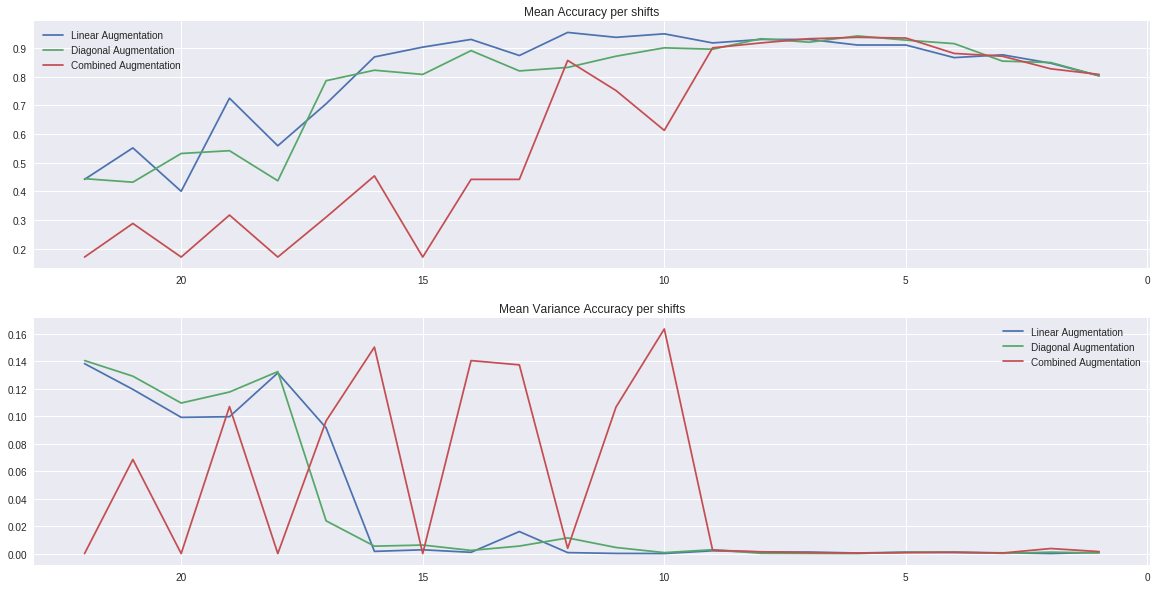

In [9]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'shifts')

### Maximum Information per Image

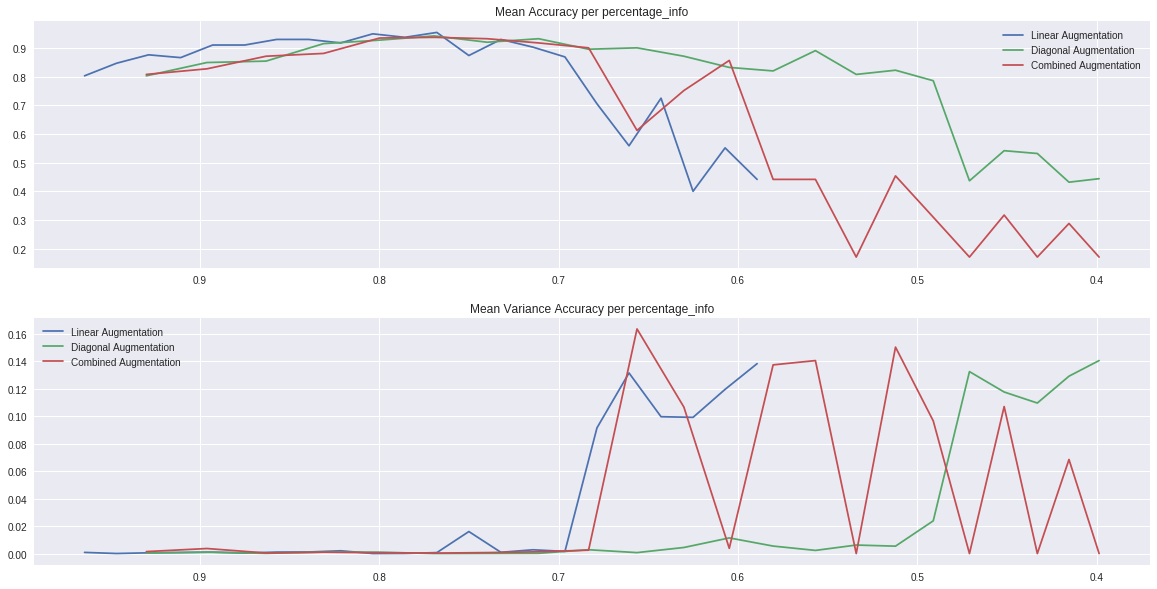

In [10]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'percentage_info')

### Signal-to-Noise Ratio

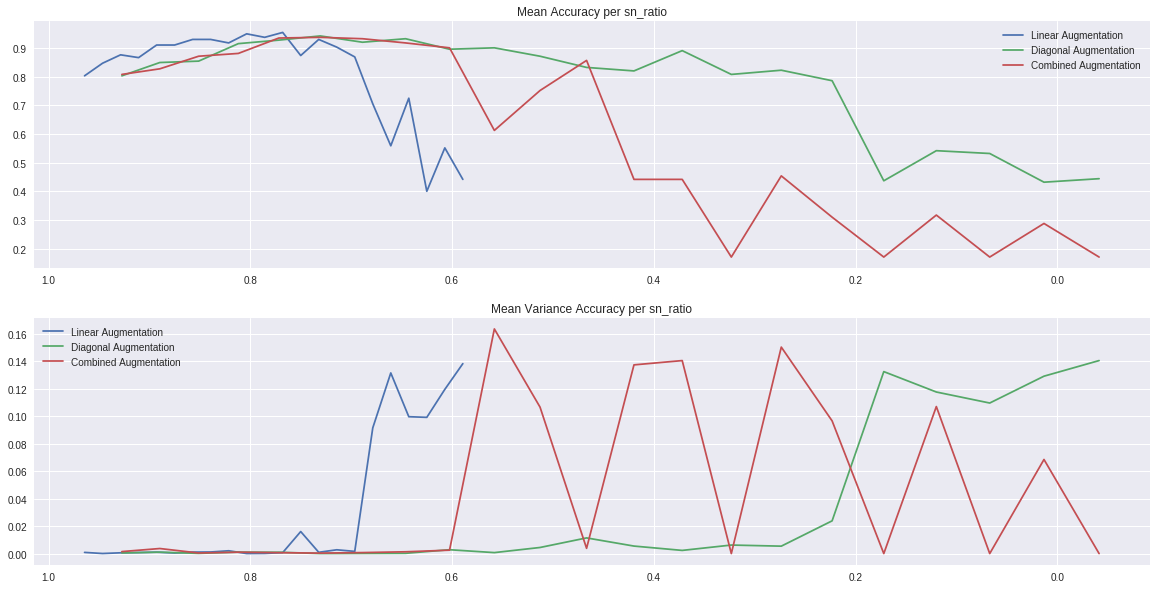

In [11]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'sn_ratio')

# Single Runs

In [12]:
linear_pkl = 'results_single/linear_non_augmented_test/performance_linear_non_augmented_test.pkl'
diagonal_pkl = 'results_single/diagonal_non_augmented_test/performance_diagonal_non_augmented_test.pkl'
combined_pkl = 'results_single/combined_non_augmented_test/performance_combined_non_augmented_test.pkl'

### Shifts

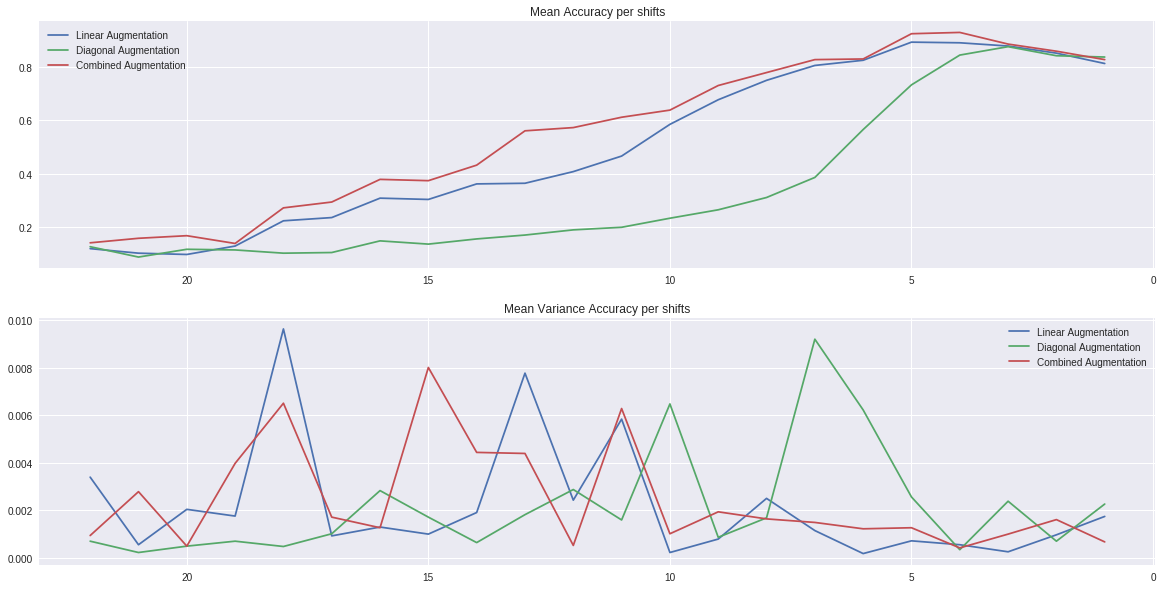

In [13]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'shifts')

### Maximum Information per Image

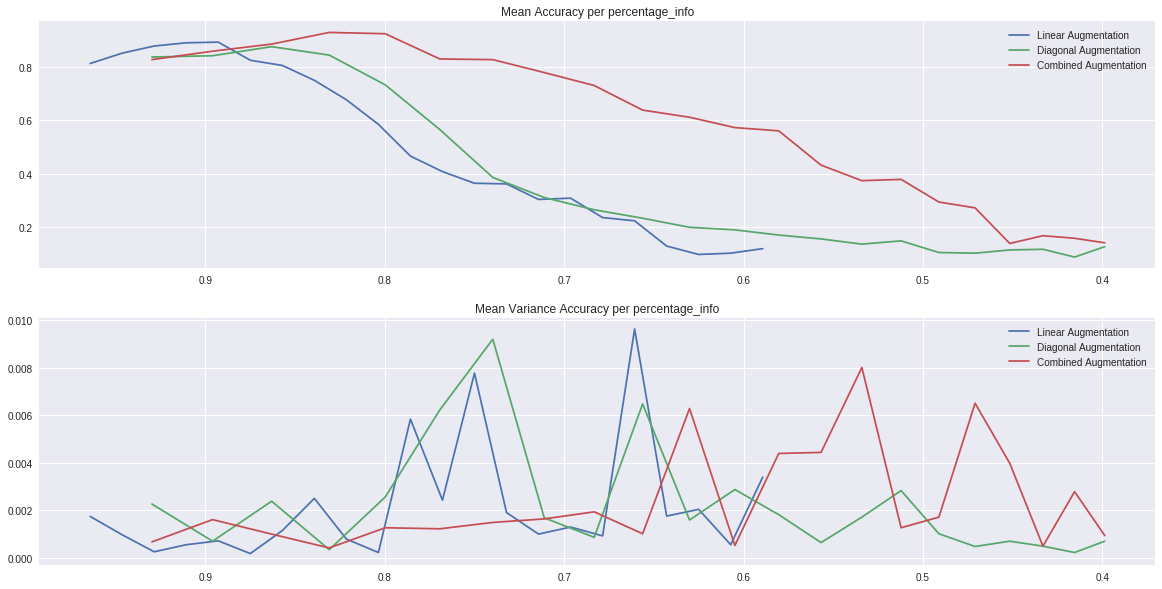

In [14]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'percentage_info')

### Signal-to-Noise Ratio

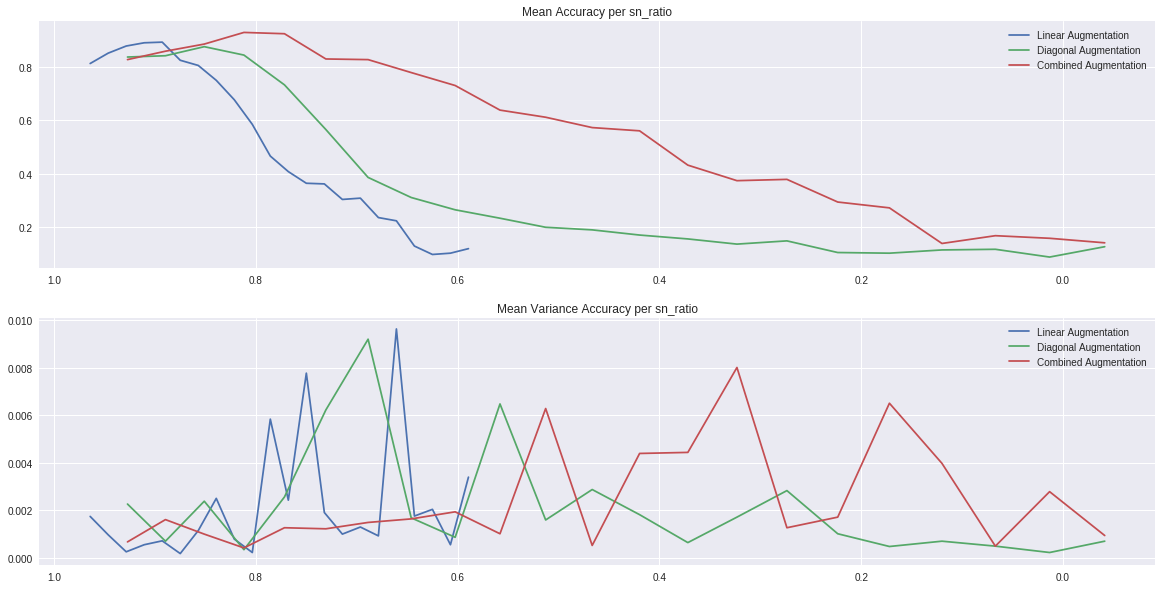

In [15]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'sn_ratio')